# DESAFIO MODELO DE REGRESSÃO

### Objetivo:

Criar um modelo de Regressão a partir da base de dados pública Air Quality, que pode ser encontrada nesta URL: https://archive.ics.uci.edu/ml/datasets/Air+Quality 

### Necessidade:

O modelo de regressão em Python foi criando considerando os pontos abaixo:

•	O dataset deve ser o Air Quality;<br />
•	A variável alvo é a PT08.S4 (óxido de tungstênio);<br />
•	Predizer o valor da variável alvo, dada uma combinação de valores das variáveis explicativas;<br />
•	Explicar o porque escolheu o algoritmo de regressão usado (e porque não usou outros);<br />
•	Receber as entradas específicas (escolher as variáveis pertinentes);<br />
•	Justificar a escolha das variáveis;<br />
•	Apresentar a saída estimada;<br />
•	Justificar a performance do modelo de regressão, com base nos métodos de avaliação pertinentes.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
# Importação dos dados da base iris.data para aplicar Machine Learning
df_airq = pd.read_csv('AirQualityUCI.csv', sep=';')

In [3]:
# Renomeando os nomes das colunas
df_airq.rename(columns={'CO(GT)':'co_gt','PT08.S1(CO)':'pt08s1_co','NMHC(GT)':'nmhc_gt','C6H6(GT)':'c6h6_gt'
                        ,'PT08.S2(NMHC)':'pt08s2_nmhc','NOx(GT)':'nox_gt','PT08.S3(NOx)':'pt08s3_nox','NO2(GT)':'no2_gt'
                        ,'PT08.S4(NO2)':'pt08s4_no2','PT08.S5(O3)':'pt08s5_o3'}, inplace=True)
df_airq = df_airq.iloc[:,:-2]
df_airq.columns = df_airq.columns.str.lower()

In [4]:
# Deletando todos as linhas com NaN
df_airq.dropna(axis=0, inplace=True)

In [5]:
# Ajustando tipo dos dados 
#df_airq.info()
df_airq['t'] = df_airq['t'].replace(',','.', regex=True).astype(float)
df_airq['rh'] = df_airq['rh'].replace(',','.', regex=True).astype(float)
df_airq['ah'] = df_airq['ah'].replace(',','.', regex=True).astype(float)
df_airq['co_gt'] = df_airq['co_gt'].replace(',','.', regex=True).astype(float)
df_airq['c6h6_gt'] = df_airq['c6h6_gt'].replace(',','.', regex=True).astype(float)
df_airq['date'] = pd.to_datetime(df_airq['date'])
df_airq['time'] = df_airq['time'].str[:2]
df_airq['time'] = df_airq['time'].astype(str).astype(int)

In [6]:
# Criando coluna mês para merge da média
df_airq['mes'] = df_airq['date'].dt.month
df_airq['mes'] = df_airq['mes'].astype(str).astype(int)

In [7]:
# Com exceção do Date e Time, todos os campos possuem -200, a solução foi usar a média de cada campo 
#    considerando mês/hora para não perder informação dos demais campos.
df_airq.query('c6h6_gt == -200')['ah'].count()

366

In [8]:
# Fazendo agrupamento com média dos campos usando mes e time 
for i in df_airq.iloc[:,2:15]:
    df_mean = df_airq.query('{0} != -200'.format(i)).copy()
    df_mean = df_mean.groupby(['mes','time'])['{0}'.format(str(i))].mean()
    df_mean = df_mean.to_frame()
    df_mean.rename(columns={'{0}'.format(str(i)):'{0}_mean'.format(str(i))}, inplace=True)
    df_airq = pd.merge(df_airq, df_mean, on=['mes','time'])   

In [9]:
# Trocando todos os valores -200 por média calculada anteriormente
df_airq['co_gt'] = df_airq.apply(lambda x: x.co_gt_mean if x.co_gt == -200 else x.co_gt, axis=1)
df_airq['pt08s1_co'] = df_airq.apply(lambda x: x.pt08s1_co_mean if x.pt08s1_co == -200 else x.pt08s1_co, axis=1)
df_airq['nmhc_gt'] = df_airq.apply(lambda x: x.nmhc_gt_mean if x.nmhc_gt == -200 else x.nmhc_gt, axis=1)
df_airq['c6h6_gt'] = df_airq.apply(lambda x: x.c6h6_gt_mean if x.c6h6_gt == -200 else x.c6h6_gt, axis=1)
df_airq['pt08s2_nmhc'] = df_airq.apply(lambda x: x.pt08s2_nmhc_mean if x.pt08s2_nmhc == -200 else x.pt08s2_nmhc, axis=1)
df_airq['nox_gt'] = df_airq.apply(lambda x: x.nox_gt_mean if x.nox_gt == -200 else x.nox_gt, axis=1)
df_airq['pt08s3_nox'] = df_airq.apply(lambda x: x.pt08s3_nox_mean if x.pt08s3_nox == -200 else x.pt08s3_nox, axis=1)
df_airq['no2_gt'] = df_airq.apply(lambda x: x.no2_gt_mean if x.no2_gt == -200 else x.no2_gt, axis=1)
df_airq['pt08s4_no2'] = df_airq.apply(lambda x: x.pt08s4_no2_mean if x.pt08s4_no2 == -200 else x.pt08s4_no2, axis=1)
df_airq['pt08s5_o3'] = df_airq.apply(lambda x: x.pt08s5_o3_mean if x.pt08s5_o3 == -200 else x.pt08s5_o3, axis=1)
df_airq['t'] = df_airq.apply(lambda x: x.t_mean if x.t == -200 else x.t, axis=1)
df_airq['rh'] = df_airq.apply(lambda x: x.rh_mean if x.rh == -200 else x.rh, axis=1)
df_airq['ah'] = df_airq.apply(lambda x: x.ah_mean if x.ah == -200 else x.ah, axis=1)

In [10]:
# Obtendo somente os campos necessários
df_airq = df_airq.iloc[:,1:16]

In [11]:
# Ajustando ordem das colunas
df_airq = df_airq.iloc[:,np.r_[0,14,1,2,3,4,5,6,7,8,10,11,12,13,9]]

In [12]:
df_airq.describe()

,time,mes,co_gt,pt08s1_co,nmhc_gt,c6h6_gt,pt08s2_nmhc,nox_gt,pt08s3_nox,no2_gt,pt08s5_o3,t,rh,ah,pt08s4_no2
count,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000
mean,11.888689,6.361255,2.161438,1106.492442,230.734883,10.274375,947.285469,245.483123,826.068018,112.221716,1032.302291,18.380559,49.053549,1.025174,1458.581503
std,6.858285,3.534417,1.380152,212.975420,201.805238,7.343586,262.011256,202.332514,249.204066,46.189651,392.917869,8.872402,17.283098,0.401038,343.617890
min,0.000000,1.000000,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,221.000000,-1.900000,9.200000,0.184700,551.000000
25%,6.000000,3.000000,1.100000,948.000000,88.000000,4.800000,750.000000,104.000000,658.000000,79.476190,748.000000,11.700000,35.700000,0.739725,1232.820000
50%,12.000000,6.000000,1.900000,1074.000000,160.500000,8.600000,923.000000,185.000000,797.000000,110.000000,978.000000,17.800000,49.400000,0.997100,1469.000000
75%,18.000000,10.000000,2.800000,1234.000000,307.500000,14.100000,1118.000000,322.000000,952.000000,138.000000,1276.000000,24.600000,62.000000,1.306927,1674.750000
max,23.000000,12.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2523.000000,44.600000,88.700000,2.231000,2775.000000


In [13]:
# Gerando número de observações e variáveis
observacoes = len(df_airq)
variaveis = df_airq.columns[:-1]

In [14]:
# Coletando x e y
X = df_airq.iloc[:,:-1]
y = df_airq['pt08s4_no2'].values

In [15]:
# Criando modelo
Xc = sm.add_constant(X)
modelo_v1 = sm.OLS(y, Xc)
modelo_v2 = modelo_v1.fit()

In [16]:
# Exibindo painel com resultados para análise
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9499.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:18:57   Log-Likelihood:                -52233.
No. Observations:                8894   AIC:                         1.045e+05
Df Residuals:                    8879   BIC:                         1.046e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -655.3948     22.573    -29.034      0.000    -699.643    -611.146
time           -2.5124      0.163    -15.431      0.000      -2.832      -2.193
mes            -3.1275      0.302    -10.342      0.000      -3.720      -2.535
co_gt          48.0856      1.705     28.211      0.000      44.744      51.427
pt08s1_co       0.2572      0.012     20.590      0.000       0.233       0.282
nmhc_gt         0.0055      0.006      0.988      0.323      -0.005       0.016
c6h6_gt        -3.2251      0.817     -3.950      0.000      -4.826      -1.625
pt08s2_nmhc     1.1742      0.027     43.722      0.000       1.122       1.227
nox_gt         -0.5366      0.010    -52.501      0.000      -0.557      -0.517
pt08s3_nox      0.3418      0.008     43.938      0.000       0.327       0.357
no2_gt         -0.0155      0.042     -0.370      0.712      -0.098       0.067
pt08s5_o3      -0.0278      0.007     -3.922      0.000      -0.042      -0.014
t               8.6031      0.387     22.205      0.000       7.844       9.363
rh              3.2652      0.150     21.820      0.000       2.972       3.559
ah            250.0144      6.974     35.850      0.000     236.344     263.685
==============================================================================
Omnibus:                     1488.562   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10069.422
Skew:                          -0.629   Prob(JB):                         0.00
Kurtosis:                       8.058   Cond. No.                     5.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Criando um Correlation Plot
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variaveis, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variaveis, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

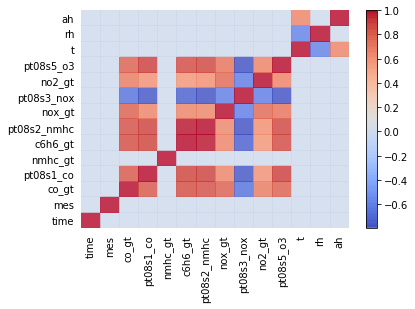

In [18]:
# Visualizando o Plot
visualize_correlation_matrix(X, hurdle = 0.5)

# Avaliando a Multicolinearidade

Como alternativa e complemento do gráfico analisado

In [19]:
# Gerando eigenvalues e eigenvectors
corr = np.corrcoef(X, rowvar = 0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [20]:
print(eigenvalues)

[6.5984044  2.13976764 1.66309954 1.14151962 0.68022968 0.55795104
 0.40888238 0.31968644 0.00998619 0.15480026 0.03590988 0.11640736
 0.07658106 0.09677451]


In [21]:
print(eigenvectors[:,8])

[ 0.0243947   0.01034511 -0.00554982 -0.00375339  0.0068935   0.62535482
 -0.75484645 -0.03688043 -0.09113409  0.03109201  0.05825652  0.12258148
  0.06009621 -0.07536419]


In [22]:
# Variáveis identificadas que possuem o mesmo nível de informação e que devem ser removidas
print(variaveis[5], variaveis[6])

c6h6_gt pt08s2_nmhc


# Recalculando modelo 
Foram removidas as variáveis identificadas na análise multicolinearidade. </p>
Foram removidas as variáveis onde o P é maior que 0.005.</p>

Foram removidas as variáveis que estão próximas de 0 na análise de correlação (matriz) </p>

In [23]:
df_airq.head(5)

,time,mes,co_gt,pt08s1_co,nmhc_gt,c6h6_gt,pt08s2_nmhc,nox_gt,pt08s3_nox,no2_gt,pt08s5_o3,t,rh,ah,pt08s4_no2
0,18,10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1268.0,13.6,48.9,0.7578,1692.0
1,18,10,2.0,1037.0,165.0,8.7,927.0,122.0,949.0,111.0,740.0,18.3,31.6,0.6562,1426.0
2,18,10,3.6,1267.0,157.5,22.0,1352.0,188.0,651.0,124.0,1196.0,21.0,37.8,0.9298,1961.0
3,18,10,4.8,1372.0,157.5,25.9,1451.0,318.0,631.0,206.0,1541.0,35.8,22.1,1.2792,2183.0
4,18,10,0.8,859.0,157.5,5.8,803.0,50.0,1032.0,67.0,479.0,30.3,21.4,0.9064,1363.0


In [24]:
# Coletando x e y
X = df_airq.iloc[:,np.r_[2,3,7,8,10,11,12,13]]
y = df_airq['pt08s4_no2'].values

In [25]:
Xc = sm.add_constant(X)
modelo_v1 = sm.OLS(y, Xc)
modelo_v2 = modelo_v1.fit()

In [26]:
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     8167.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:19:06   Log-Likelihood:                -55117.
No. Observations:                8894   AIC:                         1.103e+05
Df Residuals:                    8885   BIC:                         1.103e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -343.1623     19.431    -17.661      0.000    -381.252    -305.073
co_gt        106.1252      2.065     51.402      0.000     102.078     110.172
pt08s1_co      0.5997      0.016     38.216      0.000       0.569       0.630
nox_gt        -0.6165      0.012    -50.093      0.000      -0.641      -0.592
pt08s3_nox     0.2021      0.009     22.134      0.000       0.184       0.220
pt08s5_o3      0.2364      0.008     27.908      0.000       0.220       0.253
t             15.7715      0.509     30.965      0.000      14.773      16.770
rh             2.9991      0.200     14.961      0.000       2.606       3.392
ah           206.8693      9.278     22.297      0.000     188.682     225.056
==============================================================================
Omnibus:                      393.408   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.380
Skew:                           0.301   Prob(JB):                    1.08e-181
Kurtosis:                       4.373   Cond. No.                     2.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Aplicando o modelo de Regressão usando Scikit Learn

In [27]:
from sklearn import linear_model

In [28]:
# Criando o objeto
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [29]:
# Definindo os valores de x e y
num_observ = len(df_airq)
X = df_airq.iloc[:,np.r_[2,3,7,8,10,11,12,13]].values.reshape((num_observ, 8)) # X deve sempre ser uma matriz e nunca um vetor
y = df_airq['pt08s4_no2'].values # y pode ser um vetor

In [30]:
# Aplicando o modelo - fit()
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Resultado

In [31]:
# Impressão dos coeficientes que serão usados para as previsões
print (modelo.coef_)
print (modelo.intercept_)

[ 1.06125157e+02  5.99694069e-01 -6.16458541e-01  2.02126332e-01
  2.36443724e-01  1.57715005e+01  2.99909976e+00  2.06869276e+02]
-343.16228768499263


In [32]:
# Imprimindo as previsões
print (modelo.predict(X)[:10])

[1677.18490666 1301.68670859 1734.09192637 2180.41340569 1277.46654611
 1849.91134601 1714.81176776 1653.02316833 1399.76657159 1728.21067383]


# Conclusão

### Escolha do modelo:

Método usado: Mínimos quadrados.<br/>
Tipo Regressão: Regressão Linear Múltipla por se tratar de um problema com mais de uma variável.<br/>

O statsModel foi usado para análise das variáveis por possuir mais informações estatísticas. O sckit Learn foi usado para aplicação do modelo, pois é mais rápido e mais adequado para Machine Learning.


### Variáveis:

Inicialmente não foram descartadas nenhuma das variáveis. <br/>

A análise inicial revelou 2 variáveis que foram desconsideradas, pois estavam com P-value maior que 0.05.<br/>

Aplicando o gráfico para analisar a matriz também identificamos, como era de se esperar, que as variáveis mes e time não tinham correlação com a variável target. Também identificamos que haviam duas variáveis com possível Multicolinearidade, que foi comprovado usando autovetores. Essas duas variáveis também foram desconsideradas do modelo.


### Resultado:

A avaliação do resultado depende de cada cenário e do resultado que se desseja obter. Outro ponto é que dependendo da necessidade (não trabalhando com risco de vida por exemplo), um modelo pode ser considerado bom acima de 50% na sua primeira instancia, sendo o ideal acima de 70%. Por esse motivo e considerando o fato de que para esse modelo não tenha um resultado esperado, o valor do R2 de **0.88** é considerado bom para o modelo proposto.

É importante que o modelo esteja sempre em evolução para otimização e obtenção de melhores resultados comparado com a primeira instância.